In [5]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sb
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

from collections import namedtuple, defaultdict, Counter
import csv
from glob import glob
import json
import pickle
import random
import re
import sys

np.set_printoptions(suppress=True, precision=2, threshold=20)

Viralities: [0.25, 0.5, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0, nan]


<Figure size 432x288 with 0 Axes>

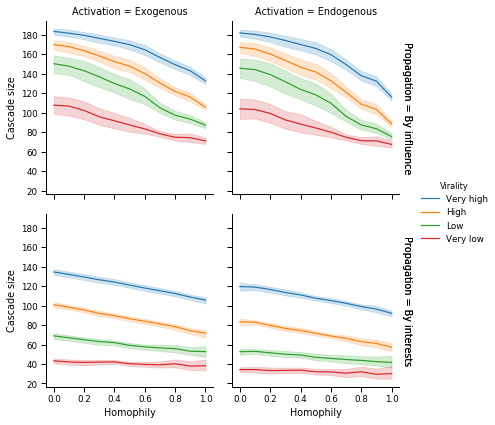

<Figure size 432x288 with 0 Axes>

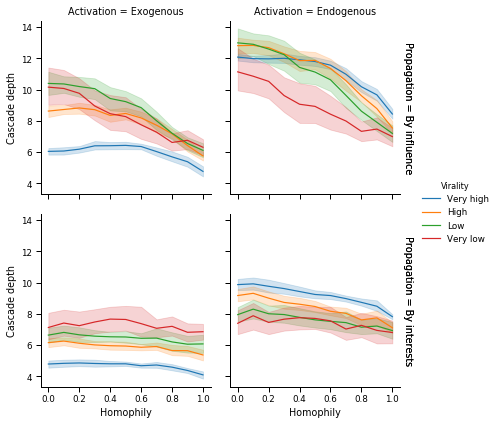

In [66]:
results = pd.DataFrame()
for path in glob("../../data/experiments/synthetic-parameter-analysis/results*.csv"):
    results = pd.concat([results, pd.read_csv(path)], sort=False)
    
print("Viralities:", sorted(results.virality_exp.unique()))

vir2text = {2: "Very high", 4: "High", 8: "Low", 32: "Very low"}

results['Virality'] = results.virality_exp.apply(vir2text.get)
results.dropna(subset = ['Virality'], inplace=True)

results["Propagation"] = results.infl_strength.apply(
    lambda n: "By interests" if np.isnan(n) else "By influence" if n == 1. else np.nan
)

results["Activation"] = results.single_activator.apply(
    lambda s: "Endogenous" if s else "Exogenous"
)

for x, x_name in [
    ("mean_node_per_item", "Cascade size"),
    ("mean_max_time", "Cascade depth")
]:
    plt.tight_layout()
    sb.set_context("paper", font_scale=1.0)
    g = sb.FacetGrid(results, col="Activation",  row="Propagation", 
                     hue='Virality', margin_titles=True, legend_out=True)
    g.map(sb.lineplot, "homophily", x).add_legend(
        ).set_axis_labels("Homophily", x_name
        ).set_titles("{col_name}")
    plt.savefig(f"../../data/experiments/plots/synth-{x}.pdf")
    plt.show()

Viralities: [1, 4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144, 1048576, 4194304, 16777216]


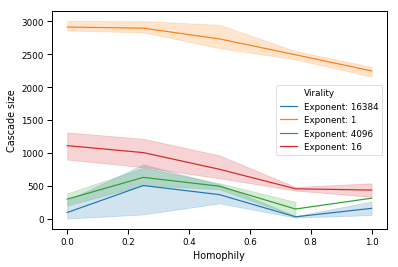

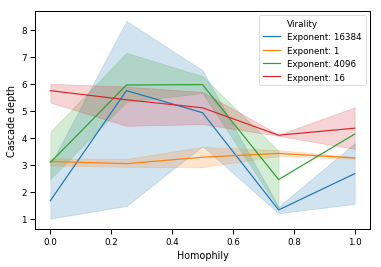

In [70]:
results = pd.read_csv(
    "../../data/experiments/real-data-comparison/"
    "digg-by-interest-results.csv")

assert len(results.infl_strength.unique()) == 1
assert len(results.single_activator.unique()) == 1

print("Viralities:", sorted(results.virality_exp.unique()))

vir2text = {k: "Exponent: " + str(k) for k in [1, 16, 32, 4096, 16384]}

results['Virality'] = results.virality_exp.apply(vir2text.get)
results.dropna(subset = ['Virality'], inplace=True)

results["Propagation"] = results.infl_strength.apply(
    lambda n: "By interests" if np.isnan(n) else "By influence" if n == 1. else np.nan
)

results["Activation"] = results.single_activator.apply(
    lambda s: "Endogenous" if s else "Exogenous"
)

for x, x_name in [
    ("mean_node_per_item", "Cascade size"),
    ("mean_max_time", "Cascade depth")
]:
    plt.tight_layout()
    sb.set_context("paper", font_scale=1.0)
    sb.lineplot(data=results,
                x="homophily",
                y=x,
                hue='Virality'
    )
    plt.xlabel("Homophily")
    plt.ylabel(x_name)
    plt.savefig(f"../../data/experiments/plots/digg-{x}.pdf")
    plt.show()